In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#General visualization settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)

In [33]:
#Path settings
fs = 237 #in Hz

forward = pd.read_csv(r"C:\Users\neurogears\OneDrive - NeuroGEARS Ltd\CricketPrelemdata\Mouse calibration\forward.csv", header= None)
sideways = pd.read_csv(r"C:\Users\neurogears\OneDrive - NeuroGEARS Ltd\CricketPrelemdata\Mouse calibration\sideways.csv", header= None)
forward.columns = sideways.columns = ['X1', 'Y1', 'X2', 'Y2']

forward = forward - forward.loc[0]
sideways = sideways - sideways.loc[0]

forward["Seconds"] = np.linspace(0,forward.shape[0]/fs, forward.shape[0])
sideways["Seconds"] = np.linspace(0,sideways.shape[0]/fs, sideways.shape[0])
forward.set_index("Seconds")
sideways.set_index("Seconds")


0          0.000000
1          0.004220
2          0.008439
3          0.012659
4          0.016878
            ...    
29379    123.966244
29380    123.970464
29381    123.974683
29382    123.978903
29383    123.983122
Name: Seconds, Length: 29384, dtype: float64

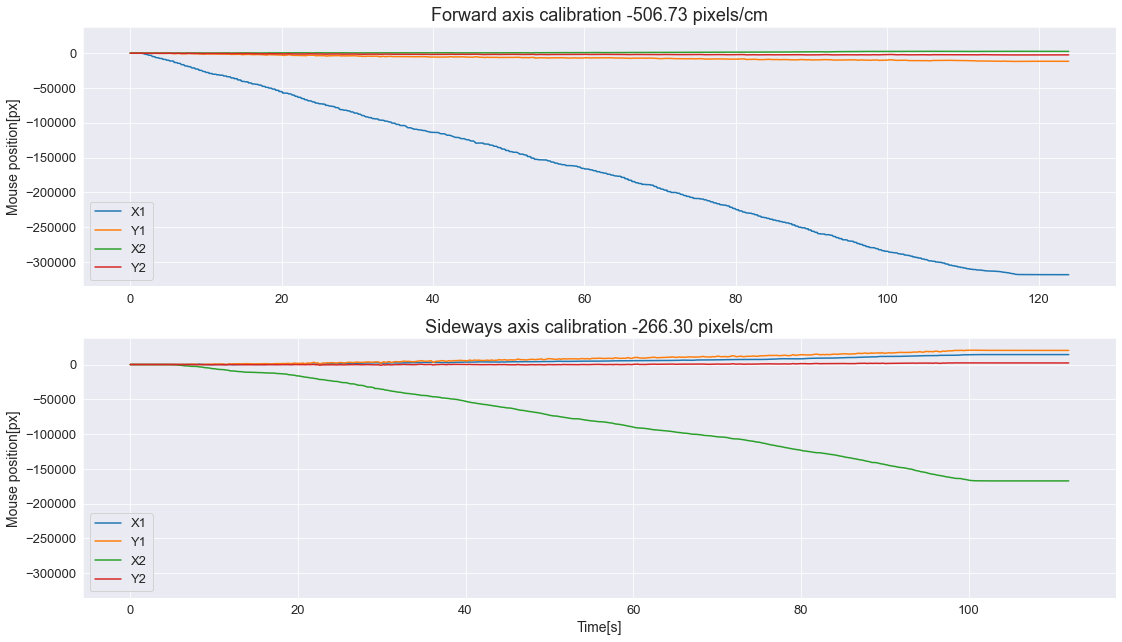

In [60]:
ball_diameter = 20 #in cm
ball_perimiter = 2.0 * np.pi * ball_diameter/2.0
nTurns = 10


fig,ax = plt.subplots(2,1, sharey=True)
fig.set_size_inches(18.5, 10.5)

for colName, col in forward.iloc[:, :-1].iteritems():
    ax[0].plot(forward["Seconds"], col.values, label = colName)
ax[0].set_ylabel("Mouse position[px]")
ax[0].set_title("Forward axis calibration {pixels:0.2f} pixels/cm".format(pixels = forward.loc[forward.index[-1], "X1"] / (nTurns * ball_perimiter) ))
ax[0].legend()

for colName, col in sideways.iloc[:, :-1].iteritems():
    ax[1].plot(sideways["Seconds"], col.values, label = colName)
ax[1].set_xlabel("Time[s]")
ax[1].set_ylabel("Mouse position[px]")
ax[1].set_title("Sideways axis calibration {pixels:0.2f} pixels/cm".format(pixels = sideways.loc[sideways.index[-1], "X2"] / (nTurns * ball_perimiter) ))
ax[1].legend()


In [55]:
sideways.loc[sideways.index[-1], "X2"]

-167320